Importing neccessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

We load the data and create a copy of the same so that every work is done in the copy of the data and we don't affect the original data

In [2]:
raw_data = pd.read_csv('Used_Car_Sales.csv')
data = raw_data.copy()

Checking our data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [4]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [5]:
data2 = data.dropna() # data without any NA values

In [6]:
data2.describe()

,Price,Mileage,EngineV,Year
count,4025.000000,4025.000000,4025.000000,4025.000000
mean,19552.308065,163.572174,2.764586,2006.379627
std,25815.734988,103.394703,4.935941,6.695595
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,90.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21900.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [7]:
data_dup=data2.duplicated().sum() #checking the duplicate values
data_dup

50

In [8]:
data2.loc[data2.duplicated(), :] #seeing the duplicate values
data3=data2.drop_duplicates() #removing the duplicate values

In [9]:
data3.describe()

,Price,Mileage,EngineV,Year
count,3975.000000,3975.000000,3975.000000,3975.000000
mean,19056.936091,164.820126,2.763643,2006.290063
std,24976.141632,103.117252,4.965189,6.683223
min,600.000000,0.000000,0.600000,1969.000000
25%,6950.000000,92.000000,1.800000,2002.000000
50%,11400.000000,159.000000,2.200000,2007.000000
75%,21317.500000,230.000000,3.000000,2011.000000
max,300000.000000,980.000000,99.990000,2016.000000


After checking the dataset we found that it contained values which are not correct in reference to the context so we remove them

In [10]:
data4=data3[data3.EngineV != 99.99] 

In [11]:
data5=data4[data4.EngineV <= 10] 
data5.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


After cleaning the data we check and remove all the outliers in the data

In [12]:
#checking the outliers

data6 = data5[['Price','Mileage','EngineV']] 
q3, q1 = data6.quantile(0.75), data6.quantile(0.25), 
iqr = q3-q1
maxm, minm = q3 + 1.5*iqr, q1 - 1.5*iqr 

print(((data6 < minm) | (data6 > (maxm))).sum())

data6.head()

Price      342
Mileage     40
EngineV    149
dtype: int64


,Price,Mileage,EngineV
0,4200.0,277,2.0
1,7900.0,427,2.9
2,13300.0,358,5.0
3,23000.0,240,4.2
4,18300.0,120,2.0


In [13]:
data7 = data5[~((data6 < minm) | (data6 > maxm)).any(axis=1)]
data7.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
7,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,A6


In [14]:
data8 = data7[['Price','Mileage','EngineV']]
print(((data8 < minm) | (data8 > (maxm))).sum())

Price      0
Mileage    0
EngineV    0
dtype: int64


We then scale the data for our use

In [15]:
data_unscaled = data7.copy()
data_unscaled[['Mileage','EngineV']].describe()

,Mileage,EngineV
count,3470.000000,3470.000000
mean,172.831124,2.277703
std,91.970769,0.735267
min,0.000000,0.600000
25%,109.000000,1.800000
50%,168.000000,2.000000
75%,237.000000,2.600000
max,435.000000,4.800000


In [16]:
data_unscaled.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
7,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,A6


In [17]:
scaler = StandardScaler()
x = data_unscaled[['Mileage','EngineV']]
scaler.fit(x)
x_scaled = scaler.transform(x)

data_scaled = data_unscaled.copy()
data_scaled[['Mileage','EngineV']] = x_scaled

In [18]:
pd.set_option('display.float_format', '{:.3f}'.format)
data_scaled[['Mileage','EngineV']].describe()

,Mileage,EngineV
count,3470.000,3470.000
mean,-0.000,0.000
std,1.000,1.000
min,-1.879,-2.282
25%,-0.694,-0.650
50%,-0.053,-0.378
75%,0.698,0.438
max,2.851,3.431


Creating the dummy variables

In [33]:
data_scaled.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.000,sedan,1.133,-0.378,Petrol,yes,1991,320
1,Mercedes-Benz,7900.000,van,2.764,0.846,Diesel,yes,1999,Sprinter 212
3,Audi,23000.000,crossover,0.730,2.615,Petrol,yes,2007,Q7
4,Toyota,18300.000,crossover,-0.575,-0.378,Petrol,yes,2011,Rav 4
7,Audi,14200.000,vagon,0.295,0.574,Diesel,yes,2006,A6


In [34]:
data_scaled.columns

Index(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model'],
      dtype='object')

In [36]:
data_dummy = pd.get_dummies(data_scaled, drop_first = True)
data_dummy.head()

,Price,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Model_Vista,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_Yaris,Model_Z3,Model_Z4
0,4200.000,1.133,-0.378,1991,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7900.000,2.764,0.846,1999,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23000.000,0.730,2.615,2007,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,18300.000,-0.575,-0.378,2011,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,14200.000,0.295,0.574,2006,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Creating and training the data

In [37]:
y = data_dummy['Price']
x = data_dummy.drop('Price', axis =1)

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33) 

In [39]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [50]:
y_pred_train = model.predict(x_train)

In [57]:
eval_df_train = pd.DataFrame({
      'Predicted': y_pred_train,
      'Observed': y_train, 
      'Error': np.abs(y_pred_train) - y_train,
      'Abs. Error': np.abs(y_pred_train - y_train)
 })

eval_df_train.head(10)

,Predicted,Observed,Error,Abs. Error
178,10880.000,12900.000,-2020.000,2020.000
2885,5750.500,8300.000,-2549.500,2549.500
3995,11452.188,10300.000,1152.188,1152.188
1978,9103.188,8950.000,153.188,153.188
329,3938.812,3500.000,438.812,438.812
1639,1140.750,1150.000,-9.250,9.250
214,24437.125,28900.000,-4462.875,4462.875
4026,18865.250,15200.000,3665.250,3665.250
523,27868.688,34500.000,-6631.312,6631.312
3843,18541.688,22000.000,-3458.312,3458.312


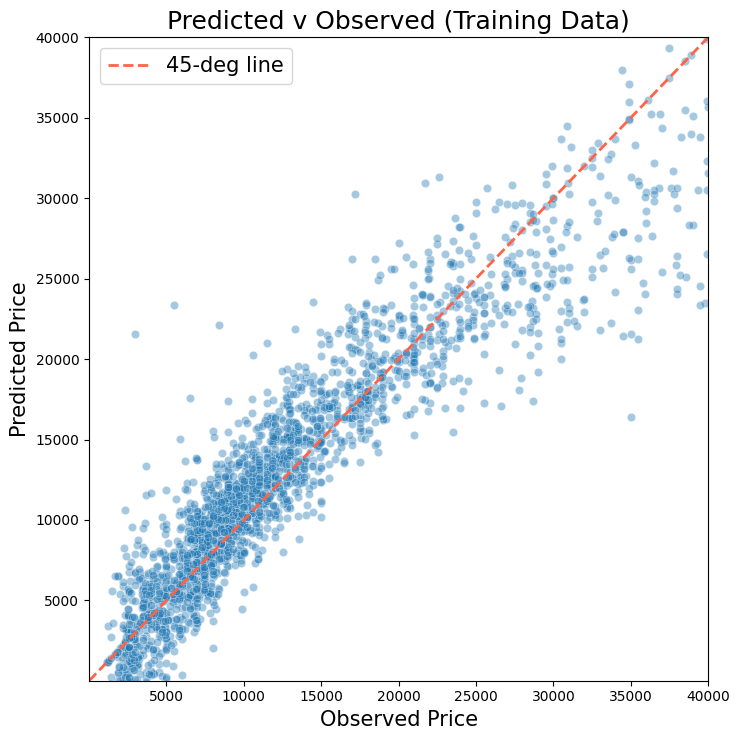

In [52]:
plt.figure(figsize = (7.5,7.5), tight_layout = True)
sns.scatterplot(x = y_train, y = y_pred_train, alpha = 0.4, color = 'tab:blue')
plt.xlabel('Observed Price', fontsize = 15)
plt.ylabel('Predicted Price', fontsize = 15)
plt.xlim(7,40000)
plt.ylim(7,40000)
plt.title('Predicted v Observed (Training Data)', fontsize = 18)
plt.plot([0, 40000], [0, 40000], color = 'tomato', ls = '--', lw = 2, label = '45-deg line')
plt.legend(fontsize = 15)
plt.show()

In [53]:
y_pred = model.predict(x_test)

In [56]:
eval_df = pd.DataFrame({
    'Predicted': y_pred,
    'Observed': y_test,
    'Residual': y_pred - y_test,
    'Abs. Error': np.abs(y_pred - y_test)
    })

eval_df.head(10)

,Predicted,Observed,Residual,Abs. Error
3895,13126.438,15400.000,-2273.562,2273.562
213,23415.062,19999.000,3416.062,3416.062
105,1138.188,3500.000,-2361.812,2361.812
1666,11543.000,11700.000,-157.000,157.000
3857,10550.500,15200.000,-4649.500,4649.500
468,7186.438,8500.000,-1313.562,1313.562
1151,9393.500,9700.000,-306.500,306.500
933,7105.500,5700.000,1405.500,1405.500
887,14027.625,14100.000,-72.375,72.375
3491,11970.562,9800.000,2170.562,2170.562


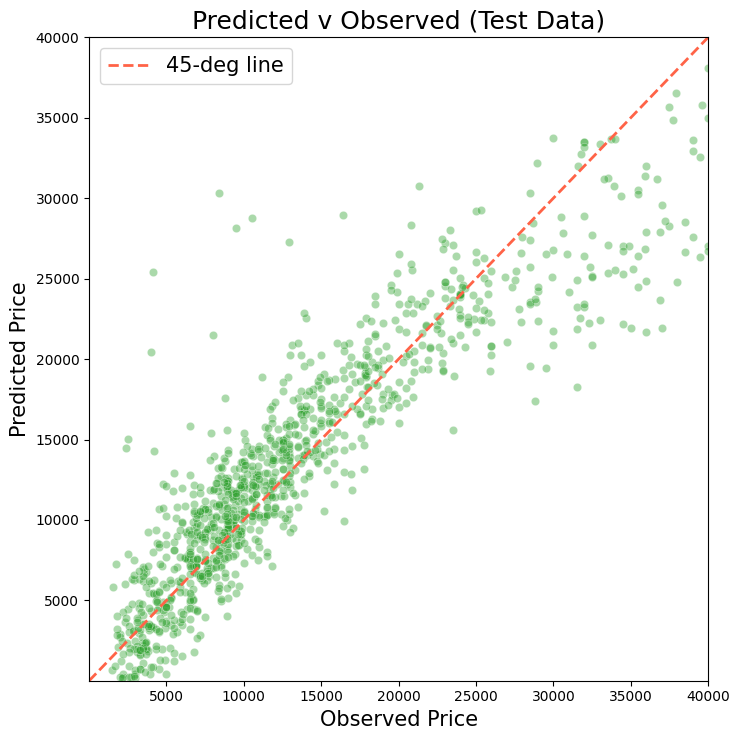

In [55]:
plt.figure(figsize = (7.5, 7.5), tight_layout = True)
sns.scatterplot(x = y_test, y = y_pred, alpha = 0.4, color = 'tab:green')
plt.xlabel('Observed Price', fontsize = 15)
plt.ylabel('Predicted Price', fontsize = 15)
plt.xlim(7,40000)
plt.ylim(7,40000)
plt.title('Predicted v Observed (Test Data)', fontsize = 18)
plt.plot([0, 40000], [0, 40000], color = 'tomato', ls = '--', lw = 2, label = '45-deg line')
plt.legend(fontsize = 15)
plt.show()